In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [2]:
path_train = '/kaggle/input/satria/train/DataTrain.csv'
path_test = '/kaggle/input/satria/test/DataTest.csv'

df_train = pd.read_csv(path_train, sep=';')
df_test = pd.read_csv(path_test, sep=';')

df_train = df_train[['Vehicleregistrationplate', 'NameofFile']]
df_test = df_test[['Name of File']]

df_train.head(5)

,Vehicleregistrationplate,NameofFile
0,A7814,DataTrain1.png
1,B1074QO,DataTrain2.png
2,B1031QO,DataTrain3.png
3,B187EDA,DataTrain4.png
4,B1089VD,DataTrain5.png


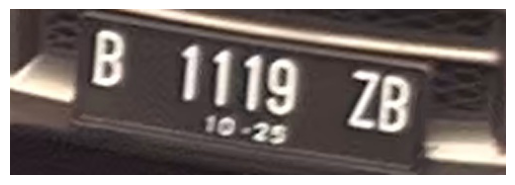

In [3]:
index = 21
path = '/kaggle/input/satria/train/DataTrain' + str(index) + '.png'
image = cv.imread(path)

plt.imshow(image)
plt.axis('off')
plt.show()

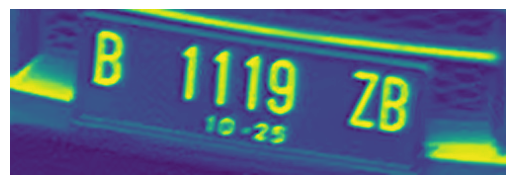

In [4]:
image_abu = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image_abu)
plt.axis('off')
plt.show()

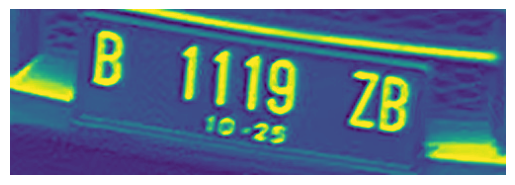

In [5]:
image_blur = cv.GaussianBlur(image_abu, (0, 0), 3)
image_sharpened = cv.addWeighted(image_abu, 1.5, image_blur, -0.5, 0)
plt.imshow(image_sharpened)
plt.axis('off')
plt.show()

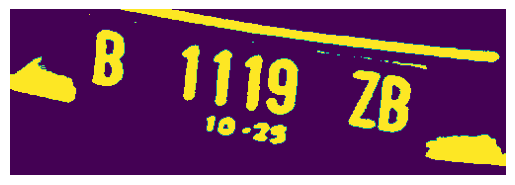

In [6]:
_, binary_image = cv.threshold(image_sharpened, 127, 255, cv.THRESH_BINARY)
plt.imshow(binary_image)
plt.axis('off')
plt.show()

In [7]:
contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv.contourArea, reverse=True)

chars = []
# Iterate over contours
for contour in contours:
    # Get the bounding rectangle
    x, y, w, h = cv.boundingRect(contour)
    
    # Draw the bounding rectangle (optional)
    cv.rectangle(binary_image, (x, y), (x + w, y + h), (0, 255, 0), 1)
    
    # Crop the character region from the image
    character = binary_image[y:y + h, x:x + w]
    chars.append(character)

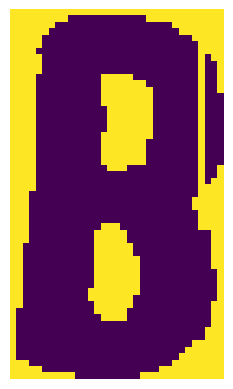

In [8]:
i = 4
img = chars[i]
inverted_image = cv.bitwise_not(img)
plt.imshow(inverted_image)
plt.axis('off')
plt.show()

In [9]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/input/model/model_prediksi_angka_huruf.h5')

# Fungsi untuk memprediksi huruf dan angka dari gambar
def predict(image):
    # Ubah gambar menjadi bentuk dan skala yang diharapkan oleh model
    image = cv.resize(image, (28, 28))
    image = np.reshape(image, (1, 28, 28, 1))
    image = image / 255.0

    # Lakukan prediksi menggunakan model
    predictions = model.predict(image)

    # Ambil indeks prediksi dengan nilai tertinggi
    predicted_class = np.argmax(predictions)


    return predicted_class

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
daftar_huruf = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F',
               'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
               'X', 'Y', 'Z']

i = predict(img)
print("Prediksi: ", daftar_huruf[i])

1/1 [==============================] - 0s 297ms/step
Prediksi:  B


In [11]:
def image_to_list_contour(image):
    img = cv.imread(image)
    img_abu = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_blur = cv.GaussianBlur(img_abu, (0, 0), 3)
    img_tajam = cv.addWeighted(img_abu, 1.5, img_blur, -0.5, 0)
    _, img_binary = cv.threshold(img_tajam, 127, 255, cv.THRESH_BINARY)
    plt.imshow(img_binary)
    plt.axis('off')
    contours, _ = cv.findContours(img_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda c: cv.boundingRect(c)[0])
    chars = []
    # Iterasi melalui kontur
    for contour in contours:
        # Dapatkan bounding rectangle
        x, y, w, h = cv.boundingRect(contour)

        # Gambar bounding rectangle (opsional)
        cv.rectangle(img_binary, (x, y), (x + w, y + h), (0, 255, 0), 1)

        # Potong region karakter dari gambar
        character = img_binary[y:y + h, x:x + w]
        chars.append(character)
        
    return chars

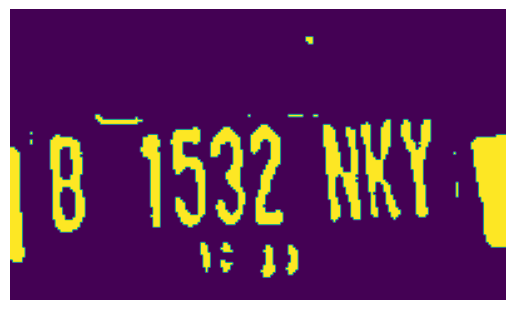

In [12]:
index = 700
path = '/kaggle/input/satria/train/DataTrain' + str(index) + '.png'
list_contour = image_to_list_contour(path)

In [13]:
print(len(list_contour))

24


1/1 [==============================] - 0s 22ms/step
Prediksi:  3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [  0 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [  0 255 255 255 255 255   0   0 255 255 255 255   0   0]
 [  0 255 255 255   0   0   0   0 255 255 255 255   0   0]
 [  0 255 255 255   0   0   0   0   0 255 255 255   0   0]
 [  0 255 255 255   0   0   0   0   0 255 255 255 255   0]
 [  0 255 255 255   0   0   0   0   0 255 255 255 255   0]
 [  0 255 255   0   0   0   0   0   0 255 255 255 255   0]
 [  0   0   0   0   0   0   0   0   0 255 255 255 255   0]
 [  0   0   0   0   0   0   0   0   0 255 255 255 255   0]
 [  0   0   0   0   0   0   0   0   0 255 255 255 255   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 

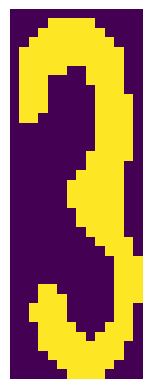

In [14]:
j = 8
im = list_contour[j]
i = predict(im)
print("Prediksi: ", daftar_huruf[i])
plt.imshow(im)
plt.axis('off')
print(im)

In [15]:
from PIL import Image

# Membuat objek gambar PIL dari array NumPy
image = Image.fromarray(im)

# Menyimpan gambar sebagai file PNG
nama_file = '3_0'
image.save(nama_file + '.png')

In [16]:
def cari_ukuran(list_contour, letter):
    ukuran = []
    for index, huruf in enumerate(list_contour):
        i = predict(huruf)
        if daftar_huruf[i] == letter:
            tinggi, lebar = huruf.shape
            tmp = []
            tmp.append(tinggi)
            tmp.append(lebar)
            tmp.append(index)
            ukuran.append(tmp)
    return ukuran

In [17]:
letter = '5'
ukuran = cari_ukuran(list_contour, letter)
print(ukuran)

1/1 [==============================] - 0s 25ms/step
[]
